# Introductory challenge material

<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="center"; style="background-color:transparent;"><a href = "https://joliot.cea.fr/drf/joliot/recherche/neurospin"><img src="https://baobablab.github.io/bhb/images/collaborators/cea.jpg" width="35%"></td>
    <td align="center"; style="background-color:transparent; width: 50%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/brain_anatomy_schizophrenia/raw/main/DATAIA-h.png" width="80%"></a></td>
  </tr>
</table> 
</div>

<center><h1>Predict schizophrenia using brain anatomy</h1></center>


<center><i>Edouard Duchesnay, Antoine Grigis, Benoît Dufumier (Université Paris-Saclay, CEA, NeuroSpin), François Caud, Alexandre Gramfort (Université Paris-Saclay, DATAIA) </i></center>

Predict schizophrenia from brain grey matter (GM). schizophrenia is associated with diffuse and complex pattern of brain atrophy. We will try to learn a predictor of the clinical status (patient with schizophrenia vs. healthy control) using GM measurements on the brain participants.


## Dataset

There are 410 samples in the training set and 103 samples in the test set.


### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`age` column for regression problem.

## Evaluation metrics

[sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

The main Evaluation metrics is the Root-mean-square deviation
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation). We will also
look at the R-squared
[R2](https://en.wikipedia.org/wiki/Coefficient_of_determination).


## Links


- [RAMP-workflow’s documentation](https://paris-saclay-cds.github.io/ramp-workflow/)
- [RAMP-workflow’s github](https://github.com/paris-saclay-cds/ramp-workflow)
- [RAMP Kits](https://github.com/ramp-kits)

## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

Therefore, we advise you to install [Anaconda
distribution](https://www.anaconda.com/download/) which include almost all
dependencies.

Only `nilearn` and `ramp-workflow` are not included by default in the Anaconda
distribution. They will be installed from the execution of the notebook.

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

If you are using conda, we provide an environment.yml file for similar usage.

```
conda env create -f environment.yml
```

Then, you can activate the environment using:

```
conda activate brain-anatomy-schizophrenia
```

And desactivate using

```
conda deactivate
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Execute the jupyter notebook, from the root directory using:

```
jupyter notebook brain_anatomy_schizophrenia_starting_kit.ipynb
```

Tune your model using the starting_kit

3. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

4. Submission on RAMP:

[Using RAMP starting-kits](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Descriptive statistics

         age                                                    
       count       mean        std   min   25%   50%   75%   max
set                                                             
test   103.0  33.466019  12.809935  14.0  23.5  31.0  41.0  66.0
train  410.0  33.068293  12.562225  15.0  22.0  29.0  43.0  65.0
           age
set   sex     
test  0.0   65
      1.0   38
train 0.0  257
      1.0  153


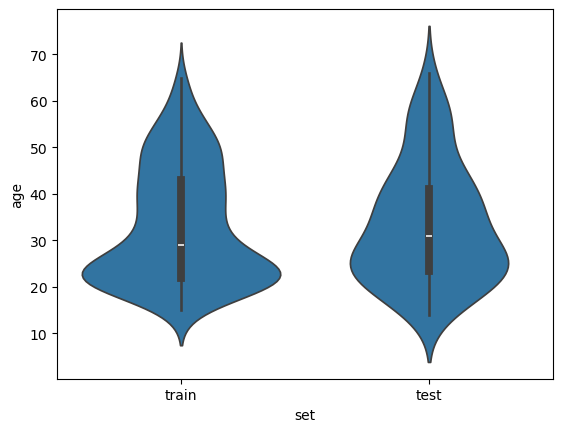

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

sns.violinplot(x="set", y="age", data=participants)
print(participants[["age", "set"]].groupby("set").describe())
print(participants[["set", "sex", "age"]].groupby(["set", "sex"]).count())

## Unsupervized analysis: Explore main sources of variabilities

Load ROIs data, `train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [2]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois = pd.concat([rois_train, rois_test])

### PCA on ROIs: explore global effect of age

                 sum_sq     df          F        PR(>F)
diagnosis   2606.207928    1.0  29.245287  9.808873e-08
Residual   45538.013350  511.0        NaN           NaN
                 sum_sq     df          F    PR(>F)
diagnosis    791.094363    1.0  10.876419  0.001042
Residual   37167.493121  511.0        NaN       NaN


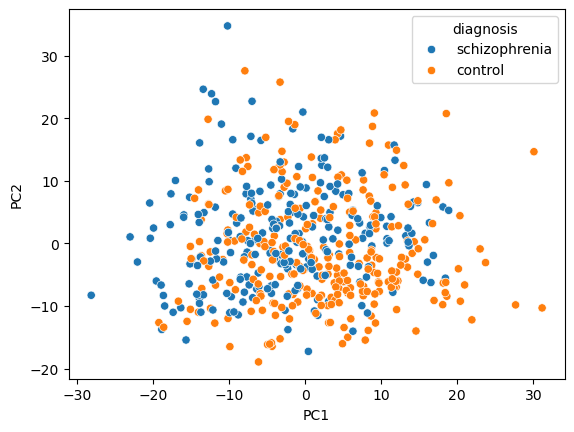

In [3]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

PCs = PCA(n_components=2).fit_transform(rois)
participants['PC1'], participants['PC2']  = PCs[:, 0], PCs[:, 1]

sns.scatterplot (x="PC1", y="PC2", hue="diagnosis",  data=participants)
oneway = smf.ols('PC1 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))
oneway = smf.ols('PC2 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))

Diagnosis is associated with two first components, we expect to be abble to predict the diagnosis

## Machine learning


Import and read data

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

Load concatenated data: 284 features from ROIs and 331,695 features from VBM.

In [5]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

assert X_train.shape[1] == 284 + 331695

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [6]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

fe = VBMFeatureExtractor()
print(fe.transform(X_train).shape)

(410, 284)
(410, 331695)


## Design of predictors and their evaluation using CV and test set

The framework is evaluated with a cross-validation approach. The metrics used are the ROC-AUC (auc) and the balanced Accuracy (bacc).

First we propose a simple classification predictor based on ROIs features only:

In [7]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.8s finished


# 5CV
bACC=0.71 ROC-AUC=0.77
# Test
bACC=0.63 ROC-AUC=0.74


Then we test a simple classification predictor based on large VBM features, using `RandomForestClassifier` that will be faster on high dimensionnal VBM data.

In [8]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    RandomForestClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.6s finished


# 5CV
bACC=0.70 ROC-AUC=0.76
# Test
bACC=0.63 ROC-AUC=0.70


## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [9]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(),
        MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))

    return estimator

Run locally:
    
```
ramp-test --submission starting_kit
```

## Submission on RAMP:


Follow the instructions: [Submitting to a ramp event](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html#submitting-to-a-ramp-event)

The event is [Predict schizophrenia from brain grey matter (classification)](https://ramp.studio/problems/brain_anatomy_schizophrenia)

# COMP0189 - Coursework 2 - Machine learning prediction of patients with schizophrenia from anatomical brain imaging

Please note we assume the data and supporting functions provided by the challenge have been run in the section above.

In [10]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler


## Additional EDA

In [11]:
rois_train

,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,r4thVen_GM_Vol,lAcc_GM_Vol,rAcc_GM_Vol,lAmy_GM_Vol,rAmy_GM_Vol,lBst_GM_Vol,rBst_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
0,0.063950,0.058779,0.062019,0.063885,0.459166,0.495607,0.983571,1.016309,0.472519,0.458482,...,7.488130,8.622047,2.465118,2.656249,6.584050,6.213031,1.787291,2.043806,0.406808,0.403986
1,0.047534,0.044989,0.053391,0.068330,0.450894,0.434376,1.011141,0.993529,0.226344,0.301962,...,9.022685,8.544778,2.439144,2.533854,6.849889,6.730247,1.945829,2.325559,0.312825,0.426095
2,0.118209,0.088380,0.069014,0.053907,0.532099,0.547899,1.013026,0.963916,0.473561,0.486732,...,4.219249,4.258448,1.394717,1.773845,3.537319,3.663182,1.007794,0.856915,0.162711,0.193604
3,0.102882,0.084044,0.044932,0.045765,0.456206,0.459221,0.875521,0.814790,0.502073,0.506276,...,3.678205,3.383453,1.346163,1.897148,3.623939,3.865042,1.237802,1.206910,0.218570,0.204934
4,0.067550,0.065347,0.047114,0.051132,0.474947,0.491112,0.977416,0.973828,0.440044,0.484388,...,7.231215,7.043181,2.161728,2.069372,3.730283,4.239948,1.418323,1.626568,0.278396,0.292313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.068794,0.059518,0.046980,0.043630,0.434336,0.447574,0.851783,0.817232,0.379264,0.413908,...,5.072565,5.172242,1.898523,2.106861,3.237992,3.484974,1.335857,1.564092,0.234161,0.205059
406,0.082916,0.074117,0.067785,0.085905,0.355993,0.365854,0.948117,0.946708,0.345744,0.406607,...,3.162422,3.361590,1.248071,1.557411,2.514094,3.588325,0.897506,0.753853,0.114496,0.105789
407,0.053060,0.052045,0.072046,0.082462,0.545795,0.541902,0.748822,0.771230,0.569814,0.808785,...,6.295410,4.833185,1.961965,2.725465,4.364348,4.952391,1.545312,1.648777,0.230619,0.355192
408,0.045729,0.042121,0.069377,0.073696,0.447633,0.459983,1.095141,1.091655,0.504735,0.576775,...,7.388551,7.142477,3.123366,3.843983,5.997726,6.851738,2.144755,1.862476,0.637902,0.591713


In [12]:
print(X_train.shape)
participants_train

(410, 331979)


,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol,set
0,CH7098a,V1,0.0,20.0,schizophrenia,SCHIZCONNECT-VIP,NU,1712.357084,375.529152,747.089338,586.391159,train
1,A00024535,V1,0.0,26.0,control,SCHIZCONNECT-VIP,MRN,1700.601735,399.493745,721.128411,579.446172,train
2,CC7563,V1,1.0,28.0,control,SCHIZCONNECT-VIP,WUSTL,1449.327365,220.825294,661.028439,566.500051,train
3,CC3945,V1,1.0,21.0,control,SCHIZCONNECT-VIP,WUSTL,1184.699000,201.579922,560.051329,423.016129,train
4,CH8853b,V1,1.0,21.0,control,SCHIZCONNECT-VIP,NU,1518.198466,291.544632,705.384606,520.807601,train
...,...,...,...,...,...,...,...,...,...,...,...,...
405,CC6606,V1,1.0,23.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1169.876325,235.110075,532.676827,401.825749,train
406,NM1088,V1,1.0,43.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1264.250903,202.266971,594.563513,466.623251,train
407,NM8724,V1,0.0,25.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1326.247902,267.535157,620.174353,438.148000,train
408,NM4038,V1,0.0,57.0,schizophrenia,SCHIZCONNECT-VIP,WUSTL,1663.159408,418.559408,648.417341,594.962631,train


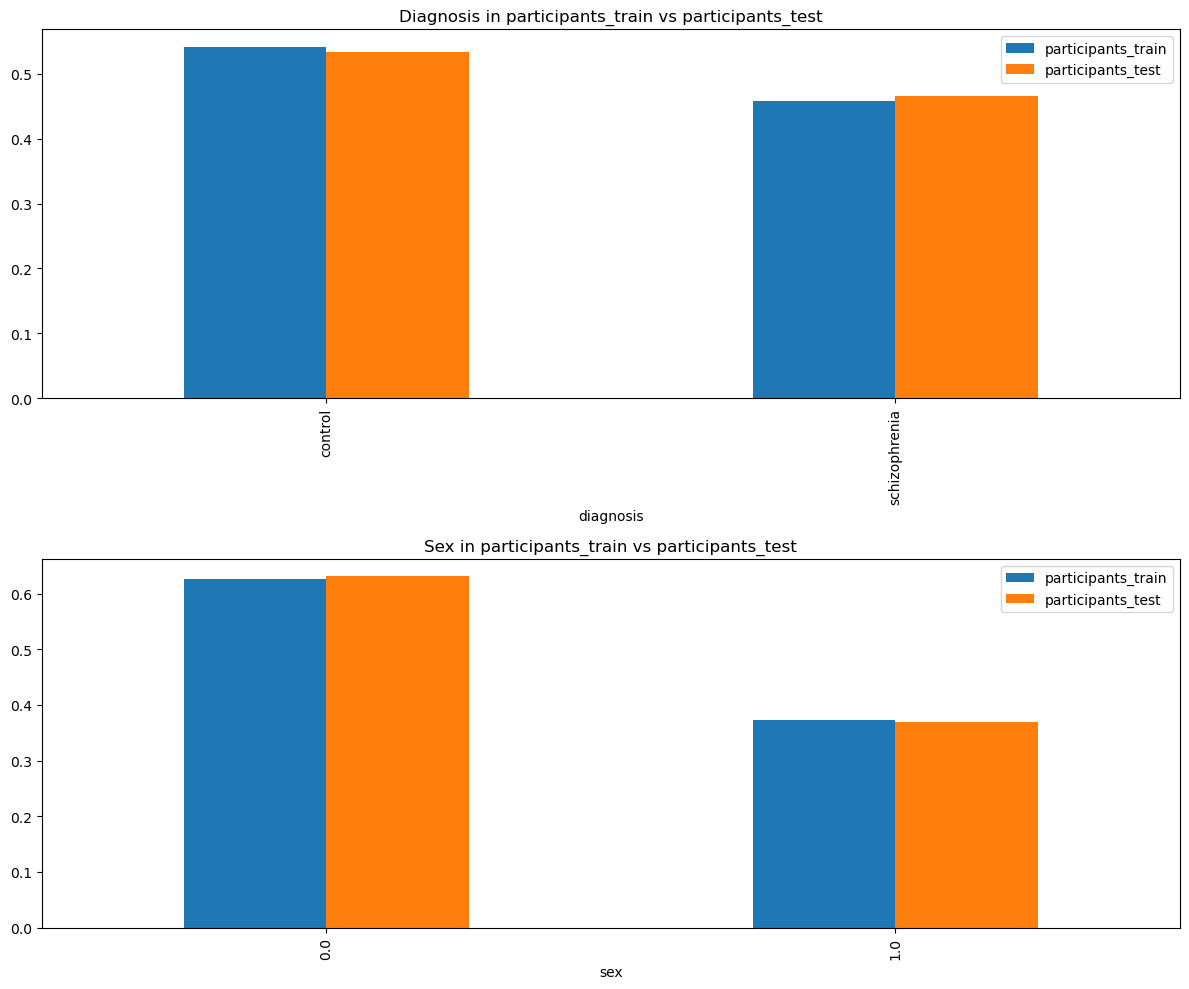

In [13]:
# Create a dataframe with proportions for each category in 'diagnosis' and 'sex'
diagnosis_proportions = pd.DataFrame({
    'participants_train': participants_train['diagnosis'].value_counts() / len(participants_train),
    'participants_test': participants_test['diagnosis'].value_counts() / len(participants_test)
})

sex_proportions = pd.DataFrame({
    'participants_train': participants_train['sex'].value_counts() / len(participants_train),
    'participants_test': participants_test['sex'].value_counts() / len(participants_test)
})

# Create grouped bar charts
fig, axs = plt.subplots(2)

diagnosis_proportions.plot(kind='bar', ax=axs[0], figsize=(12, 10))
axs[0].set_title('Diagnosis in participants_train vs participants_test')

sex_proportions.plot(kind='bar', ax=axs[1])
axs[1].set_title('Sex in participants_train vs participants_test')

plt.tight_layout()
plt.show()

In [97]:
print(participants_train['diagnosis'].value_counts() + participants_test['diagnosis'].value_counts())
print(participants_train['sex'].value_counts() + participants_test['sex'].value_counts())

diagnosis
control          277
schizophrenia    236
Name: count, dtype: int64
sex
0.0    322
1.0    191
Name: count, dtype: int64


In [14]:
fe = ROIsFeatureExtractor()
X_train_lowD = fe.transform(X_train)

fe = VBMFeatureExtractor()
X_train_highD = fe.transform(X_train)

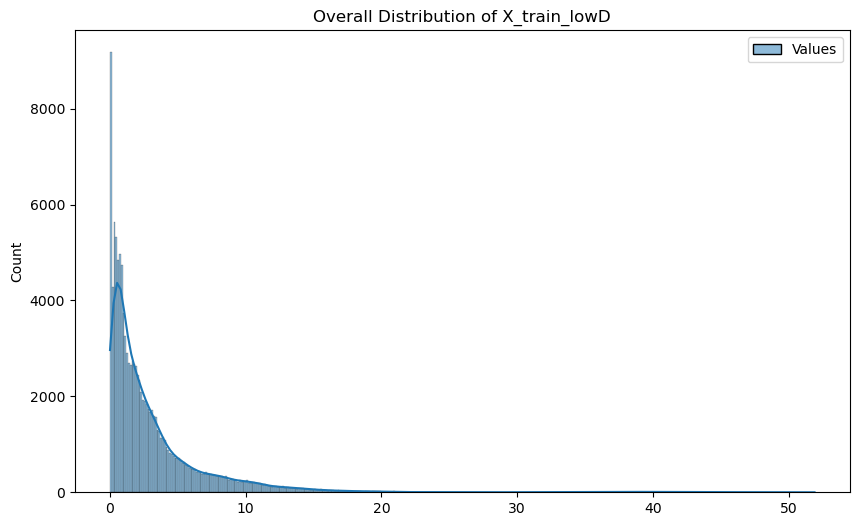

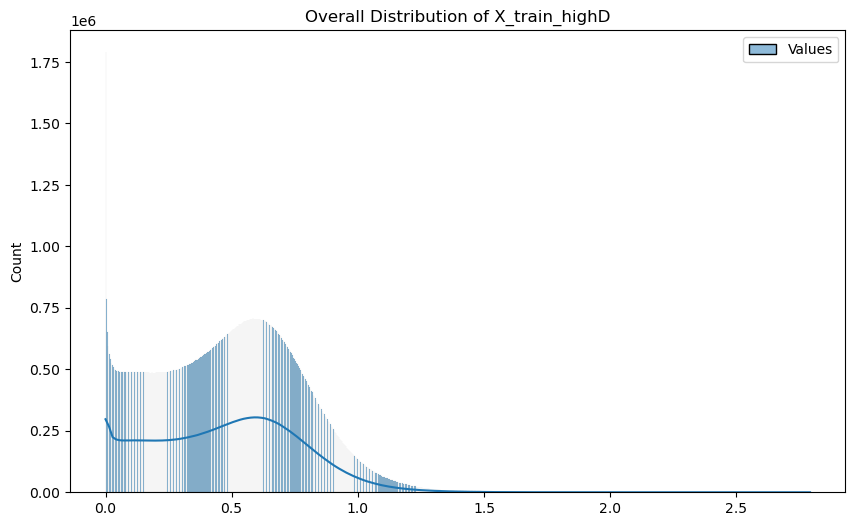

In [15]:
# Assuming X_train_lowD and X_train_highD are pandas DataFrames
# If they are numpy arrays, you can convert them to DataFrames as follows:
X_train_lowD = pd.DataFrame(X_train_lowD)
X_train_highD = pd.DataFrame(X_train_highD)


# Flatten the data and create a DataFrame
data_lowD = pd.DataFrame(X_train_lowD.values.flatten(), columns=['Values'])
data_highD = pd.DataFrame(X_train_highD.values.flatten(), columns=['Values'])

# Plot the overall distribution of the low dimensional data
plt.figure(figsize=(10, 6))
sns.histplot(data_lowD, kde=True)
plt.title('Overall Distribution of X_train_lowD')
plt.show()

# Plot the overall distribution of the high dimensional data
plt.figure(figsize=(10, 6))
sns.histplot(data_highD, kde=True)
plt.title('Overall Distribution of X_train_highD')
plt.show()

## Functions and setup

In [16]:
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 500)

In [17]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(21)

In [18]:
# Function to run random search

def run_random_search(models, cv, X_train, y_train, param_distributions, high_dimensionality, groups=None):
    random_search_objects = {}
    
    # Define multiple scoring metrics
    scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    
    for model_name in models:
        # Choose the feature extractor based on the high_dimensionality flag
        if high_dimensionality:
            fe = VBMFeatureExtractor()           
        else:
            fe = ROIsFeatureExtractor()
      
        sc = StandardScaler()
        # Create a pipeline that includes the feature extraction and the model
        pipeline = make_pipeline(fe, sc, models[model_name])
        
        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_distributions[model_name],
            cv=cv, 
            scoring=scoring,
            refit='AUC',
            n_jobs=6,
            n_iter=10)
        if groups is not None:
            random_search.fit(X_train, y_train, groups=groups)
        else:
            random_search.fit(X_train, y_train) 
        random_search_objects[model_name] = random_search
    return random_search_objects

In [74]:
def create_results_df(random_search_objects):
    # Initialize a list to store the results
    results = []

    # Loop over each model
    for model_name, random_search in random_search_objects.items():
        # Get the results of the cross-validation
        cv_results = random_search.cv_results_
        
        # Get the best parameters
        best_params = random_search.best_params_
        
        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'Best Hyperparameters': best_params,
            'Best Score': random_search.best_score_,
            'Mean Validation AUC ROC': cv_results['mean_test_AUC'].mean(),
            'Std Validation AUC ROC': cv_results['std_test_AUC'].std(),
            'Mean Validation Accuracy': cv_results['mean_test_Accuracy'].mean(),
            'Std Validation Accuracy': cv_results['std_test_Accuracy'].std(),
            'Mean Fit Time': cv_results['mean_fit_time'].mean(),
            'Std Train Time': cv_results['std_fit_time'].std(),
            'Mean Fit Time Best Performer': cv_results['mean_fit_time'][cv_results['rank_test_AUC'].argmin()],
            'Std Train Time Best Performer': cv_results['std_fit_time'][cv_results['rank_test_AUC'].argmin()],
        }
        
        # Append the result to the list
        results.append(result)

    # Create a DataFrame from the results
    df = pd.DataFrame(results)
    
    return df

In [20]:
def plot_cv_results(random_search_objects):
    # Extract the mean test scores and times from the cv_results_ attribute of each random search
    cv_scores_auc = {model: rs.cv_results_['mean_test_AUC'] for model, rs in random_search_objects.items()}
    cv_scores_accuracy = {model: rs.cv_results_['mean_test_Accuracy'] for model, rs in random_search_objects.items()}
    cv_fit_times = {model: rs.cv_results_['mean_fit_time'] for model, rs in random_search_objects.items()}
    cv_score_times = {model: rs.cv_results_['mean_score_time'] for model, rs in random_search_objects.items()}

    # Convert the dictionaries to DataFrames
    df_auc = pd.DataFrame.from_dict(cv_scores_auc, orient='index').transpose()
    df_accuracy = pd.DataFrame.from_dict(cv_scores_accuracy, orient='index').transpose()
    df_fit_times = pd.DataFrame.from_dict(cv_fit_times, orient='index').transpose()
    df_score_times = pd.DataFrame.from_dict(cv_score_times, orient='index').transpose()

    # Create violin plots of the scores and times
    for df, metric in [(df_auc, 'AUC ROC'), (df_accuracy, 'Accuracy'), (df_fit_times, 'Fit Time'), (df_score_times, 'Score Time')]:
        sns.violinplot(data=df, palette="muted")

        # Set the title and labels
        plt.title(f'Distribution of {metric} on Validation Sets')
        plt.xlabel('Model')
        plt.ylabel(metric)

        # Show the plot
        plt.show()

## Setup models and hyperparameter distributions

In [21]:
# Define models and parameters

models_dict = {
    'LogisticRegression': LogisticRegression(penalty='elasticnet', solver='saga'),
    'LGBM': LGBMClassifier(),
    'SVM_RBF': SVC(kernel='rbf')
}

param_distributions = {
    'LogisticRegression': {
        'logisticregression__C': np.logspace(-2, 2, 5),  # C values range from 0.01 to 100 on a log scale
        'logisticregression__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
        'logisticregression__l1_ratio': np.linspace(0, 0.1, 5),  # The Elastic-Net mixing parameter ranges from 0 to 0.1
        'logisticregression__max_iter': [1000, 5000, 10000]  # Maximum number of iterations taken for the solvers to converge
    },
    'LGBM': {
        'lgbmclassifier__num_leaves': list(range(15, 33, 5)),  # Number of leaves in the tree, ranges from 15 to 33 with step 5
        'lgbmclassifier__max_depth': list(range(5, 11, 2)),  # Maximum tree depth, ranges from 5 to 11 with step 2
        'lgbmclassifier__learning_rate': np.logspace(-2, 0, 3),  # Learning rate, ranges from 0.01 to 1 on a log scale
        'lgbmclassifier__n_estimators': list(range(200, 1101, 200)),  # Number of boosted trees to fit, ranges from 200 to 1100 with step 200
        'lgbmclassifier__min_data_in_leaf': list(range(20, 101, 20)),  # Minimum number of data in one leaf, ranges from 20 to 100 with step 20
        'lgbmclassifier__max_bin': list(range(200, 256, 10)),  # Maximum number of bins that feature values will be bucketed, ranges from 200 to 255 with step 10
        'lgbmclassifier__feature_fraction': np.linspace(0.6, 1.0, 5),  # Fraction of features to be used at each split, ranges from 0.6 to 1.0
        'lgbmclassifier__bagging_fraction': np.linspace(0.7, 1.0, 4),  # Fraction of data to be used for bagging, ranges from 0.7 to 1.0
        'lgbmclassifier__bagging_freq': list(range(10, 51, 20)),  # Frequency for bagging, ranges from 10 to 50 with step 20
        'lgbmclassifier__force_col_wise': [True, False]  # Whether to force column-wise calculation
    },
    'SVM_RBF': {
        'svc__C': np.logspace(-1, 2, 4),  # Penalty parameter C of the error term, ranges from 0.1 to 100 on a log scale
        'svc__gamma': np.logspace(-5, -1, 5)  # Kernel coefficient for 'rbf', ranges from 0.00001 to 0.1 on a log scale
    }
}


## Run cross-validation and visualise results

In [22]:
le = LabelEncoder()
y_train= le.fit_transform(y_train)

### K-fold cross validation pipeline

In [ ]:
# Run with k-fold validation, no stratification
kf = KFold(n_splits=5, shuffle=True)
# Low dimensional version
rs_lowD_objects = run_random_search(models_dict, kf, X_train, y_train, param_distributions, False)



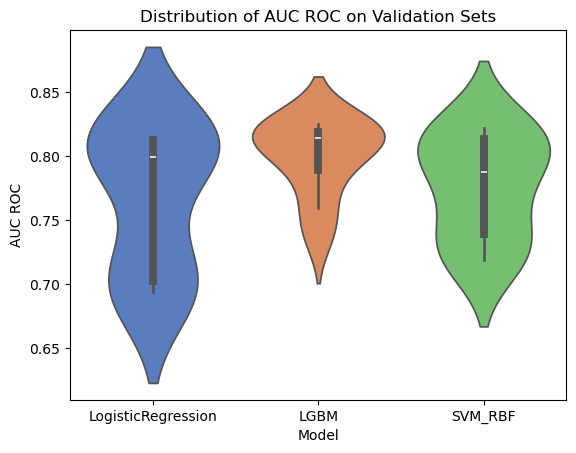

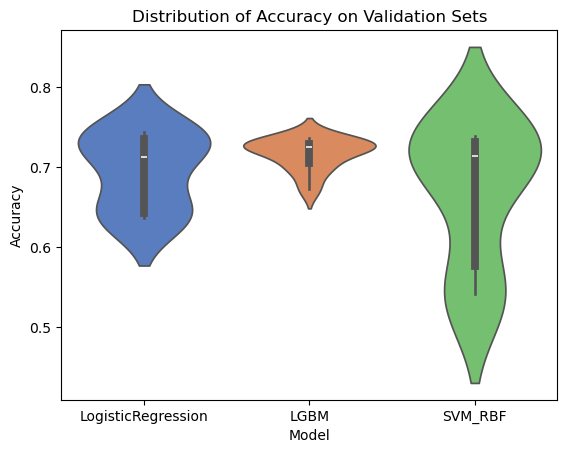

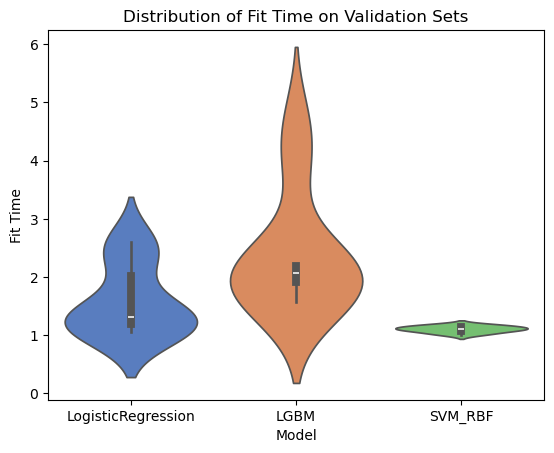

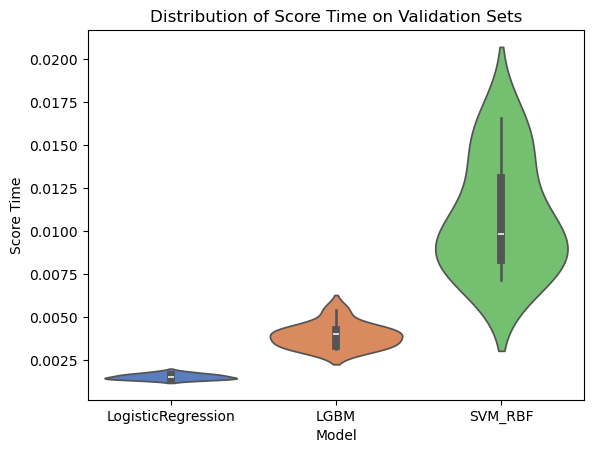

,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.025, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.814201,0.765584,0.012337,0.695122,0.018191,1.589551,0.070800,1.180984,0.060326
1,LGBM,"{'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.9, 'lgbmclassifier__bagging_freq': 10, 'lgbmclassifier__bagging_fraction': 1.0}",0.824738,0.799628,0.024471,0.716829,0.022362,2.393743,0.099063,4.644732,0.081915
2,SVM_RBF,"{'svc__gamma': 0.0001, 'svc__C': 10.0}",0.822192,0.775859,0.023508,0.666829,0.009800,1.105448,0.059161,1.131441,0.028989


In [75]:
rs_lowD_results = create_results_df(rs_lowD_objects)
plot_cv_results(rs_lowD_objects)
rs_lowD_results

In [ ]:
# High dimensional version
rs_highD_objects = run_random_search(models_dict, kf, X_train, y_train, param_distributions, True)


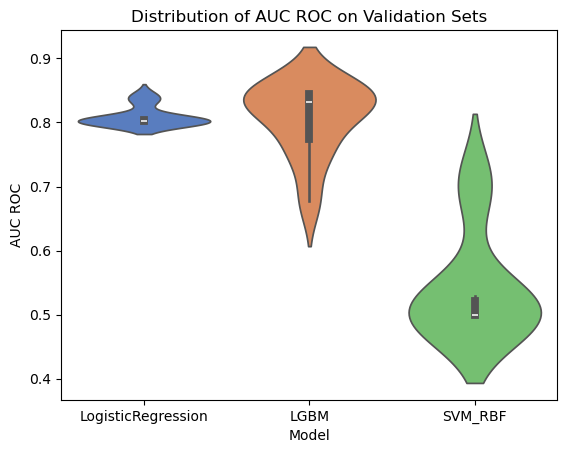

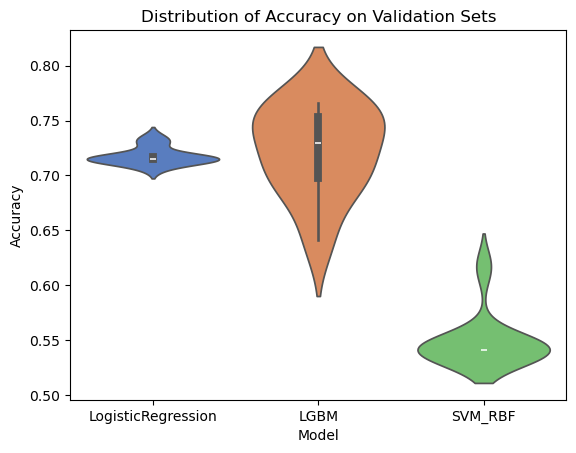

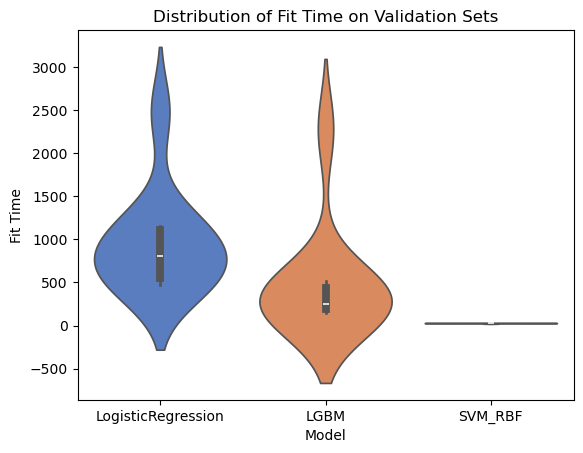

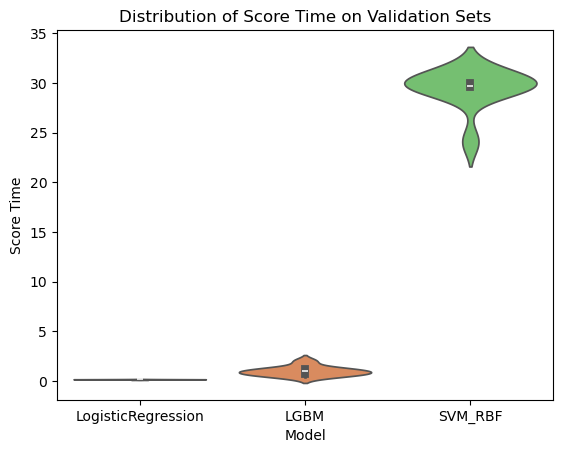

,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,"{'logisticregression__max_iter': 1000, 'logisticregression__l1_ratio': 0.1, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.840624,0.809292,0.006562,0.717805,0.013716,960.956212,56.234019,621.041026,2.649206
1,LGBM,"{'lgbmclassifier__num_leaves': 30, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 230, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 50, 'lgbmclassifier__bagging_fraction': 1.0}",0.846799,0.805950,0.008439,0.722195,0.009973,483.934068,71.342133,456.698796,112.105238
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 10.0}",0.706867,0.543463,0.019969,0.549024,0.000523,28.069505,2.357728,29.079795,0.153389


In [76]:
rs_highD_results = create_results_df(rs_highD_objects)
plot_cv_results(rs_highD_objects)
rs_highD_results

### K-fold cross validation pipeline with gender groups

In [27]:
participants_train['sex']

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
405    1.0
406    1.0
407    0.0
408    0.0
409    1.0
Name: sex, Length: 410, dtype: float64

In [28]:
# Assuming y_train is a pandas Series or DataFrame
df = pd.DataFrame({'sex': participants_train['sex'], 'target': y_train})

# Check the distribution of classes within each group
print(df.groupby('sex')['target'].value_counts())

sex  target
0.0  1         136
     0         121
1.0  0         101
     1          52
Name: count, dtype: int64


In [ ]:
# Run with k-fold validation, with groups

# Create a GroupKFold object
gkf = StratifiedGroupKFold(n_splits=2)  
groups = participants_train['sex']

grs_lowD_objects = run_random_search(models_dict, gkf, X_train, y_train, param_distributions, high_dimensionality=False, groups=groups)


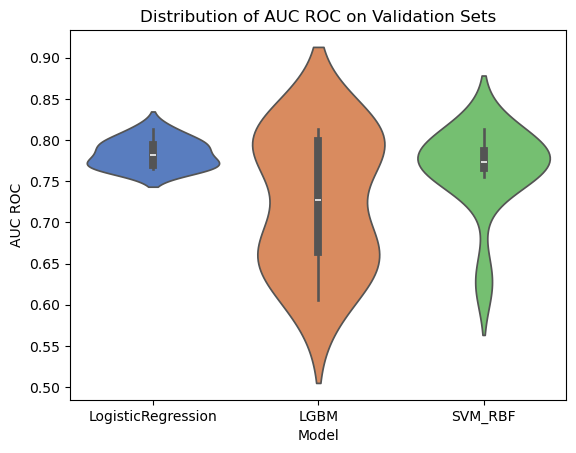

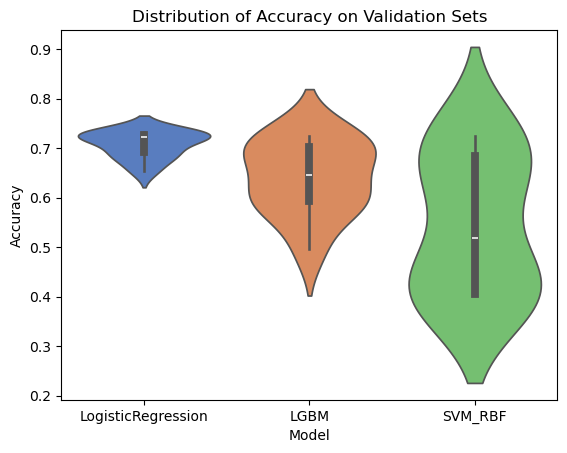

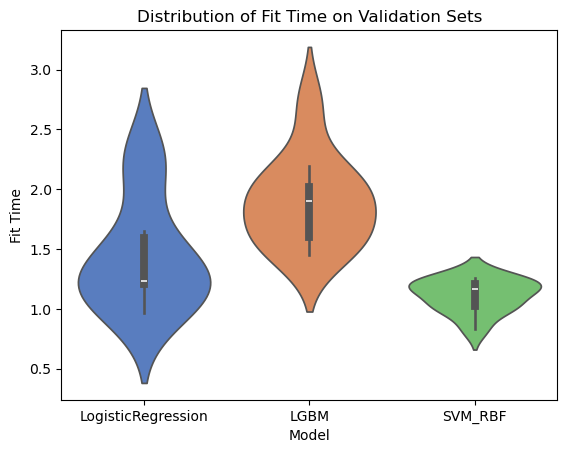

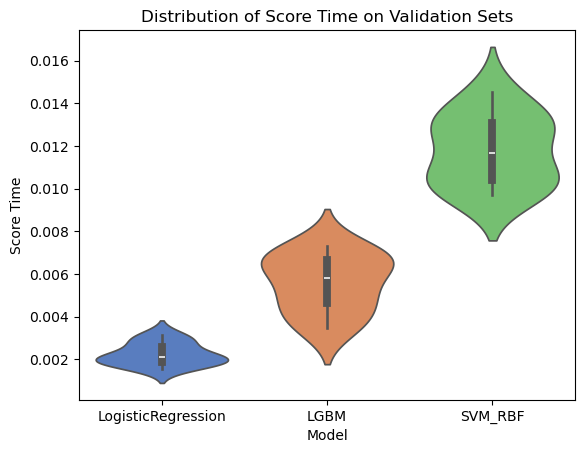

,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,"{'logisticregression__max_iter': 5000, 'logisticregression__l1_ratio': 0.0, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.813340,0.783444,0.015379,0.707778,0.012779,1.448137,0.073592,1.212891,0.019931
1,LGBM,"{'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 9, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 1.0, 'lgbmclassifier__bagging_freq': 50, 'lgbmclassifier__bagging_fraction': 0.9}",0.812813,0.725400,0.052516,0.639330,0.038691,1.896313,0.058573,1.988043,0.173254
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 100.0}",0.813781,0.764476,0.022280,0.544020,0.019942,1.113683,0.007314,1.158069,0.007883


In [79]:
grs_lowD_results = create_results_df(grs_lowD_objects)
plot_cv_results(grs_lowD_objects)
grs_lowD_results

In [ ]:
grs_highD_objects = run_random_search(models_dict, gkf, X_train, y_train, param_distributions, high_dimensionality=True, groups=groups)



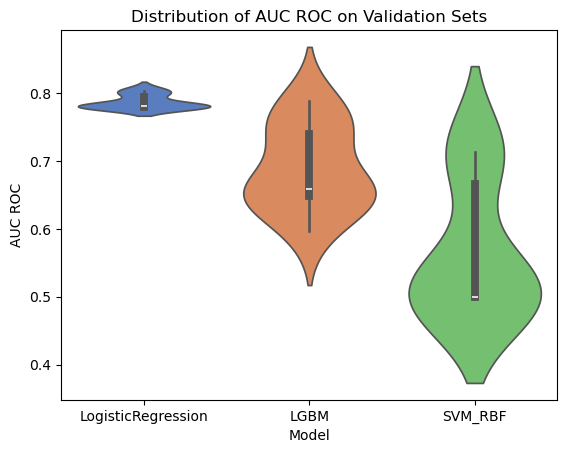

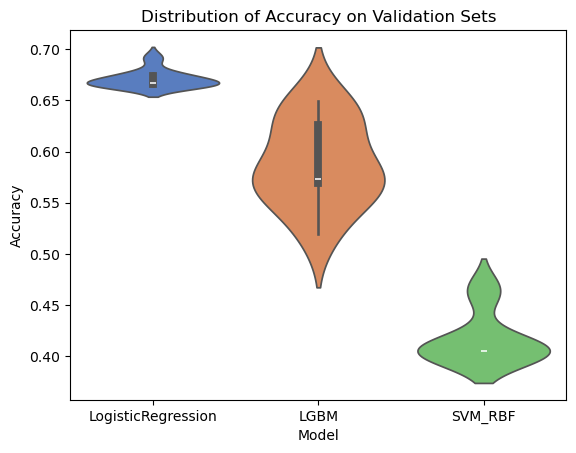

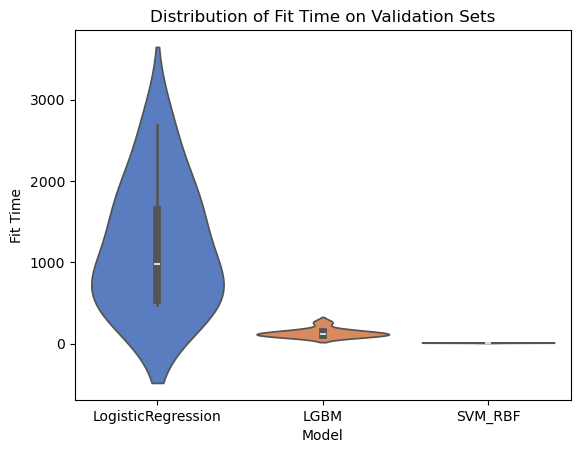

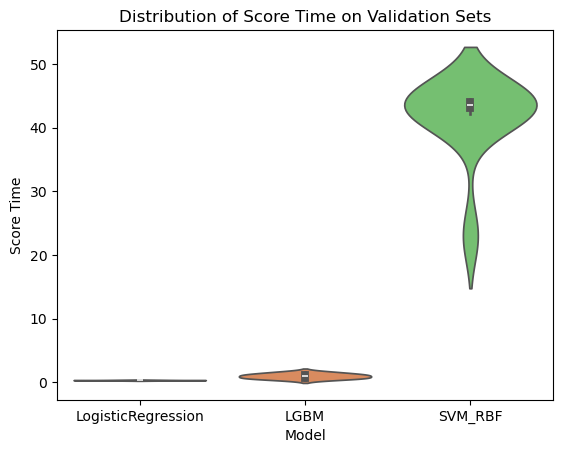

,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.07500000000000001, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.803791,0.786960,0.003340,0.670848,0.007295,1202.334020,218.856397,1576.990791,493.980698
1,LGBM,"{'lgbmclassifier__num_leaves': 25, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': False, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 30, 'lgbmclassifier__bagging_fraction': 1.0}",0.788216,0.689045,0.040955,0.587878,0.020912,133.141685,39.915191,261.221322,7.997604
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 100.0}",0.712702,0.567012,0.032785,0.417108,0.023529,10.949681,0.609826,11.731696,4.934976


In [78]:
grs_highD_results = create_results_df(grs_highD_objects)
plot_cv_results(grs_highD_objects)
grs_highD_results

### Compare/visualise all

In [118]:


# Add a new column 'Test Type' to each DataFrame
rs_highD_results['Test Type'] = 'HighD - KFold'
grs_highD_results['Test Type'] = 'HighD - GroupStratifiedKFold'
rs_lowD_results['Test Type'] = 'LowD - KFold'
grs_lowD_results['Test Type'] = 'LowD - GroupStratifiedKFold'

# Concatenate all DataFrames
df_all = pd.concat([rs_highD_results, grs_highD_results, rs_lowD_results, grs_lowD_results])
df_all


,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer,Test Type
0,LogisticRegression,"{'logisticregression__max_iter': 1000, 'logisticregression__l1_ratio': 0.1, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.840624,0.809292,0.006562,0.717805,0.013716,960.956212,56.234019,621.041026,2.649206,HighD - KFold
1,LGBM,"{'lgbmclassifier__num_leaves': 30, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 230, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 50, 'lgbmclassifier__bagging_fraction': 1.0}",0.846799,0.805950,0.008439,0.722195,0.009973,483.934068,71.342133,456.698796,112.105238,HighD - KFold
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 10.0}",0.706867,0.543463,0.019969,0.549024,0.000523,28.069505,2.357728,29.079795,0.153389,HighD - KFold
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.07500000000000001, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.803791,0.786960,0.003340,0.670848,0.007295,1202.334020,218.856397,1576.990791,493.980698,HighD - GroupStratifiedKFold
1,LGBM,"{'lgbmclassifier__num_leaves': 25, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': False, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 30, 'lgbmclassifier__bagging_fraction': 1.0}",0.788216,0.689045,0.040955,0.587878,0.020912,133.141685,39.915191,261.221322,7.997604,HighD - GroupStratifiedKFold
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 100.0}",0.712702,0.567012,0.032785,0.417108,0.023529,10.949681,0.609826,11.731696,4.934976,HighD - GroupStratifiedKFold
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.025, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.814201,0.765584,0.012337,0.695122,0.018191,1.589551,0.070800,1.180984,0.060326,LowD - KFold
1,LGBM,"{'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.9, 'lgbmclassifier__bagging_freq': 10, 'lgbmclassifier__bagging_fraction': 1.0}",0.824738,0.799628,0.024471,0.716829,0.022362,2.393743,0.099063,4.644732,0.081915,LowD - KFold
2,SVM_RBF,"{'svc__gamma': 0.0001, 'svc__C': 10.0}",0.822192,0.775859,0.023508,0.666829,0.009800,1.105448,0.059161,1.131441,0.028989,LowD - KFold
0,LogisticRegression,"{'logisticregression__max_iter': 5000, 'logisticregression__l1_ratio': 0.0, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.813340,0.783444,0.015379,0.707778,0.012779,1.448137,0.073592,1.212891,0.019931,LowD - GroupStratifiedKFold


In [119]:
# Convert Mean Validation AUC ROC, Std Validation AUC ROC, Mean Validation Accuracy, and Std Validation Accuracy to percentages and round to 1 decimal point
df_all['Mean Validation AUC ROC'] = (df_all['Mean Validation AUC ROC'] * 100).round(1)
df_all['Std Validation AUC ROC'] = (df_all['Std Validation AUC ROC'] * 100).round(1)
df_all['Mean Validation Accuracy'] = (df_all['Mean Validation Accuracy'] * 100).round(1)
df_all['Std Validation Accuracy'] = (df_all['Std Validation Accuracy'] * 100).round(1)

# Round Mean Fit Time and Mean Score Time to 1 decimal point
df_all['Mean Fit Time'] = df_all['Mean Fit Time'].round(1)
df_all['Std Train Time'] = df_all['Std Train Time'].round(1)
df_all['Mean Fit Time Best Performer'] = df_all['Mean Fit Time Best Performer'].round(1)
df_all['Std Train Time Best Performer'] = df_all['Std Train Time Best Performer'].round(1)


df_all

,Model,Best Hyperparameters,Best Score,Mean Validation AUC ROC,Std Validation AUC ROC,Mean Validation Accuracy,Std Validation Accuracy,Mean Fit Time,Std Train Time,Mean Fit Time Best Performer,Std Train Time Best Performer,Test Type
0,LogisticRegression,"{'logisticregression__max_iter': 1000, 'logisticregression__l1_ratio': 0.1, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.840624,80.9,0.7,71.8,1.4,961.0,56.2,621.0,2.6,HighD - KFold
1,LGBM,"{'lgbmclassifier__num_leaves': 30, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 230, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 50, 'lgbmclassifier__bagging_fraction': 1.0}",0.846799,80.6,0.8,72.2,1.0,483.9,71.3,456.7,112.1,HighD - KFold
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 10.0}",0.706867,54.3,2.0,54.9,0.1,28.1,2.4,29.1,0.2,HighD - KFold
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.07500000000000001, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.803791,78.7,0.3,67.1,0.7,1202.3,218.9,1577.0,494.0,HighD - GroupStratifiedKFold
1,LGBM,"{'lgbmclassifier__num_leaves': 25, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': False, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 30, 'lgbmclassifier__bagging_fraction': 1.0}",0.788216,68.9,4.1,58.8,2.1,133.1,39.9,261.2,8.0,HighD - GroupStratifiedKFold
2,SVM_RBF,"{'svc__gamma': 1e-05, 'svc__C': 100.0}",0.712702,56.7,3.3,41.7,2.4,10.9,0.6,11.7,4.9,HighD - GroupStratifiedKFold
0,LogisticRegression,"{'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.025, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01}",0.814201,76.6,1.2,69.5,1.8,1.6,0.1,1.2,0.1,LowD - KFold
1,LGBM,"{'lgbmclassifier__num_leaves': 15, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 210, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.9, 'lgbmclassifier__bagging_freq': 10, 'lgbmclassifier__bagging_fraction': 1.0}",0.824738,80.0,2.4,71.7,2.2,2.4,0.1,4.6,0.1,LowD - KFold
2,SVM_RBF,"{'svc__gamma': 0.0001, 'svc__C': 10.0}",0.822192,77.6,2.4,66.7,1.0,1.1,0.1,1.1,0.0,LowD - KFold
0,LogisticRegression,"{'logisticregression__max_iter': 5000, 'logisticregression__l1_ratio': 0.0, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.813340,78.3,1.5,70.8,1.3,1.4,0.1,1.2,0.0,LowD - GroupStratifiedKFold


In [122]:
df_hyp = df_all[['Model', 'Test Type', 'Best Hyperparameters']]
df_hyp_latex = df_hyp.to_latex(index=False)
print(df_hyp_latex)

\begin{tabular}{lll}
\toprule
Model & Test Type & Best Hyperparameters \\
\midrule
LogisticRegression & HighD - KFold & {'logisticregression__max_iter': 1000, 'logisticregression__l1_ratio': 0.1, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01} \\
LGBM & HighD - KFold & {'lgbmclassifier__num_leaves': 30, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__min_data_in_leaf': 40, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__max_bin': 230, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.8, 'lgbmclassifier__bagging_freq': 50, 'lgbmclassifier__bagging_fraction': 1.0} \\
SVM_RBF & HighD - KFold & {'svc__gamma': 1e-05, 'svc__C': 10.0} \\
LogisticRegression & HighD - GroupStratifiedKFold & {'logisticregression__max_iter': 10000, 'logisticregression__l1_ratio': 0.07500000000000001, 'logisticregression__fit_intercept': False, 'logisticregression__C': 0.01} \\
LGBM & HighD - GroupStratifiedKFold & {

In [102]:
# Select the specific columns
df_selected = df_all[['Model', 'Test Type', 'Mean Validation AUC ROC', 'Std Validation AUC ROC', 'Mean Validation Accuracy', 'Std Validation Accuracy', 'Mean Fit Time', 'Std Train Time']]

# Convert DataFrame to LaTeX table
latex_table = df_selected.to_latex(index=False)

print(latex_table)

\begin{tabular}{llrrrrrr}
\toprule
Model & Test Type & Mean Validation AUC ROC & Std Validation AUC ROC & Mean Validation Accuracy & Std Validation Accuracy & Mean Fit Time & Std Train Time \\
\midrule
LogisticRegression & HighD - KFold & 80.900000 & 0.700000 & 71.800000 & 1.400000 & 961.000000 & 56.200000 \\
LGBM & HighD - KFold & 80.600000 & 0.800000 & 72.200000 & 1.000000 & 483.900000 & 71.300000 \\
SVM_RBF & HighD - KFold & 54.300000 & 2.000000 & 54.900000 & 0.100000 & 28.100000 & 2.400000 \\
LogisticRegression & HighD - GroupStratifiedKFold & 78.700000 & 0.300000 & 67.100000 & 0.700000 & 1202.300000 & 218.900000 \\
LGBM & HighD - GroupStratifiedKFold & 68.900000 & 4.100000 & 58.800000 & 2.100000 & 133.100000 & 39.900000 \\
SVM_RBF & HighD - GroupStratifiedKFold & 56.700000 & 3.300000 & 41.700000 & 2.400000 & 10.900000 & 0.600000 \\
LogisticRegression & LowD - KFold & 76.600000 & 1.200000 & 69.500000 & 1.800000 & 1.600000 & 0.100000 \\
LGBM & LowD - KFold & 80.000000 & 2.400000 & 7

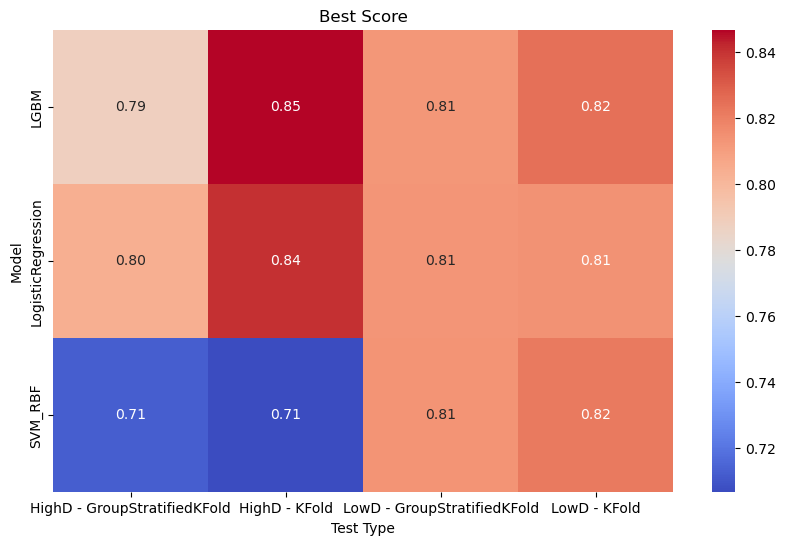

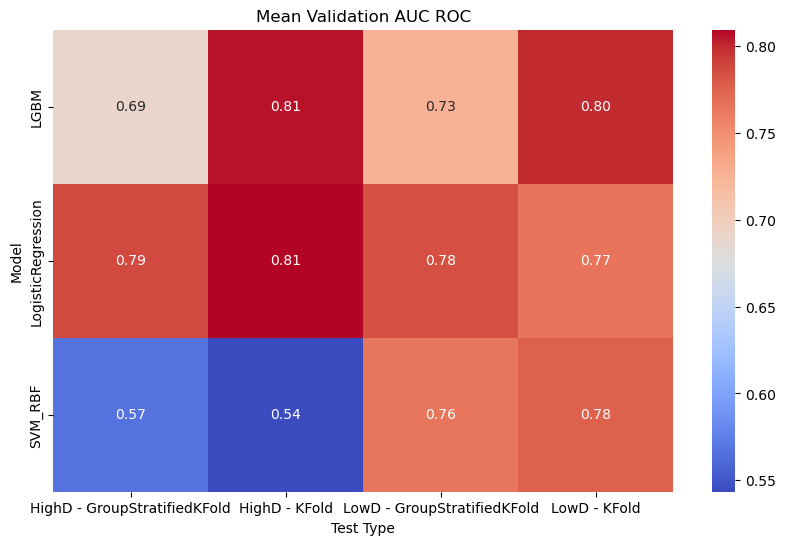

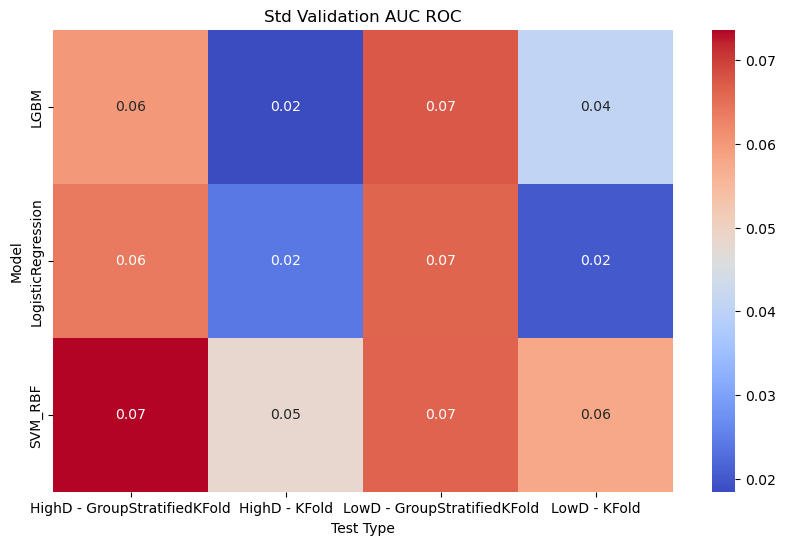

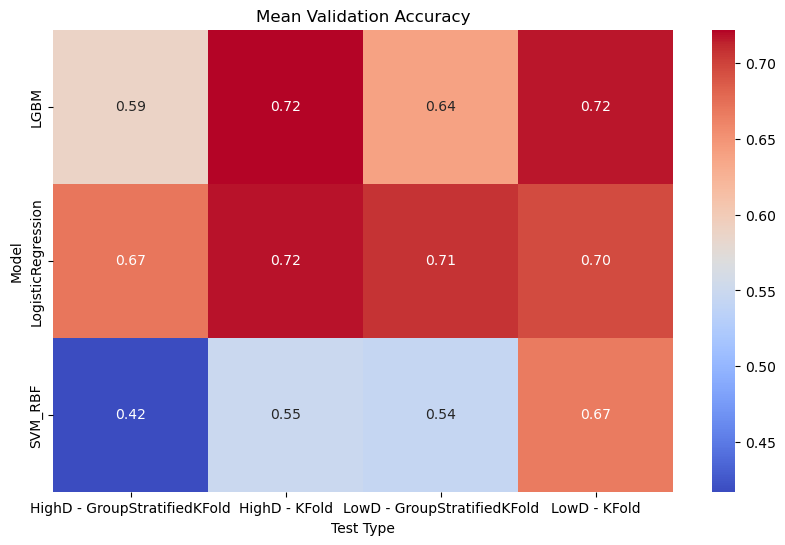

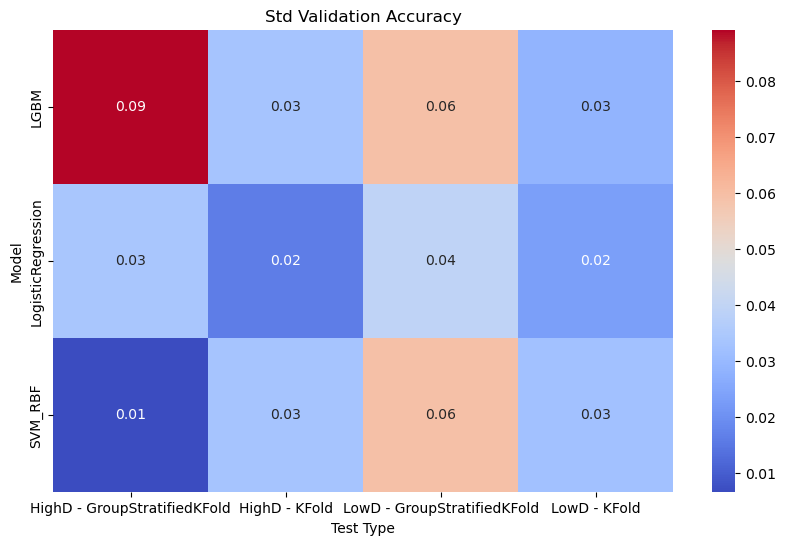

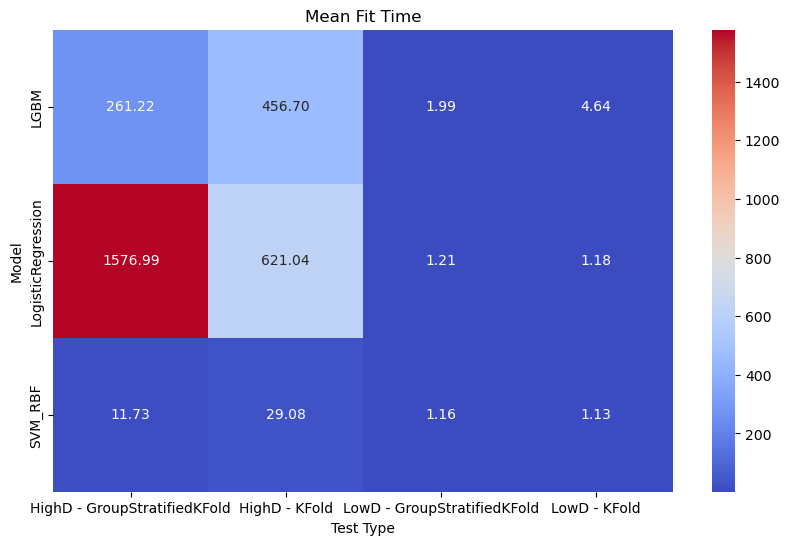

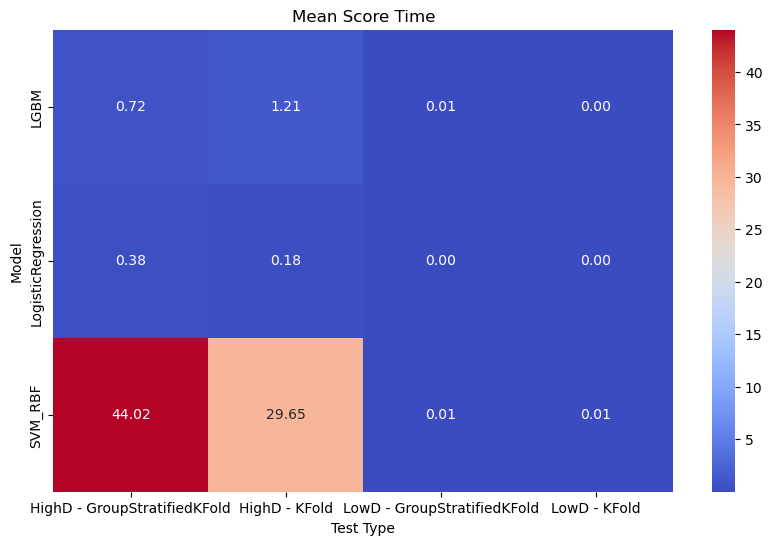

In [34]:
# Get a list of all numeric columns in the DataFrame
numeric_columns = df_all.select_dtypes(include=[np.number]).columns.tolist()

# Create a heatmap for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_all.pivot(index='Model', columns='Test Type', values=column), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(column)
    plt.show()

## Test best-performing models and visualise results

In [35]:
def test_best_models(rs_objects, X_test, y_test):
    results = []

    for name, rs in rs_objects.items():
        # Use the best estimator directly - includes model and transformation
        best_pipeline = rs.best_estimator_

        # Predict on the test set and measure score time
        start_time = timeit.default_timer()
        y_pred = best_pipeline.predict(X_test)
        score_time = timeit.default_timer() - start_time

        # Calculate the accuracy and ROC AUC of the model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Score Time': score_time
        })

    results_df = pd.DataFrame(results)
    return results_df

In [36]:
def visualize_test_results(df):
    metrics = ['Accuracy', 'ROC AUC','Score Time']
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for ax, metric in zip(axs.flatten(), metrics):
        bars = df.sort_values(by=metric, ascending=False).plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
        ax.set_ylabel(metric)
        ax.set_xlabel('')

        # Add labels on top of each bar
        for bar in bars.patches:
            bars.annotate(format(bar.get_height(), '.2f'), 
                          (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')

        # Adjust y limit to make space for the labels
        ax.set_ylim(0, 1.1 * df[metric].max())

    plt.tight_layout()
    plt.show()

### Test best-performing models from k-fold cross validation

In [64]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
y_test = le.transform(y_test)

In [ ]:
# Test the best models for rs_highD_objects
test_highD_results = test_best_models(rs_highD_objects, X_test, y_test)
# Visualize the results



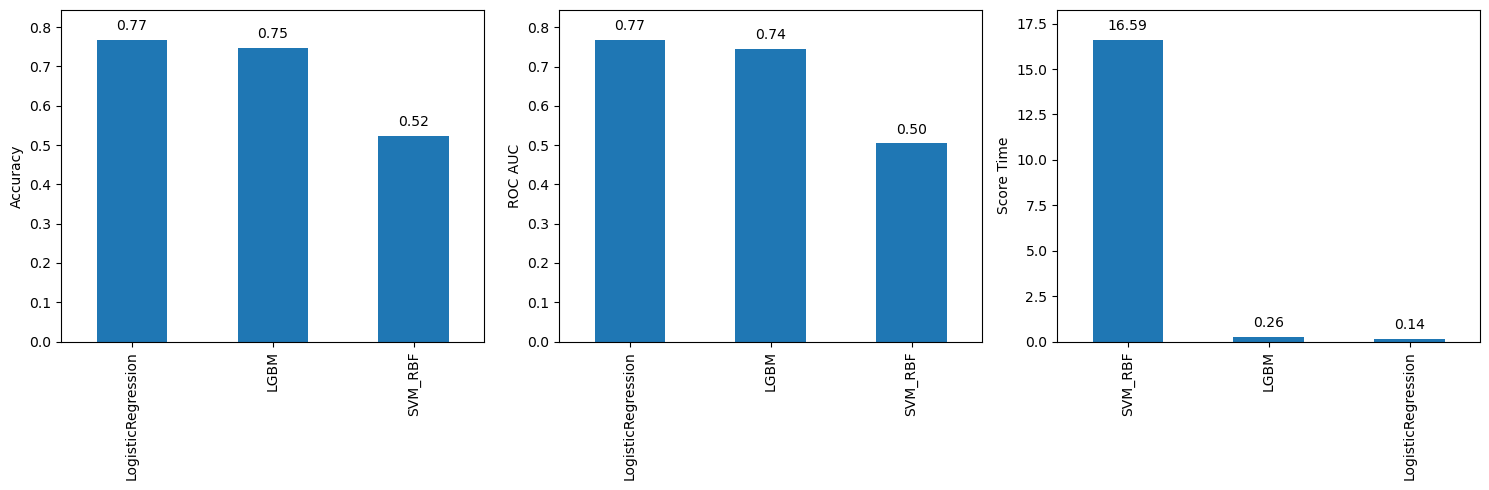

,Model,Accuracy,ROC AUC,Score Time
0,LogisticRegression,0.766990,0.767235,0.144517
1,LGBM,0.747573,0.743750,0.259799
2,SVM_RBF,0.524272,0.504167,16.590625


In [67]:
visualize_test_results(test_highD_results)
# Print the dataframe
test_highD_results

In [ ]:
# Test the best models for rs_lowD_objects
test_lowD_results = test_best_models(rs_lowD_objects, X_test, y_test)
# Visualize the results


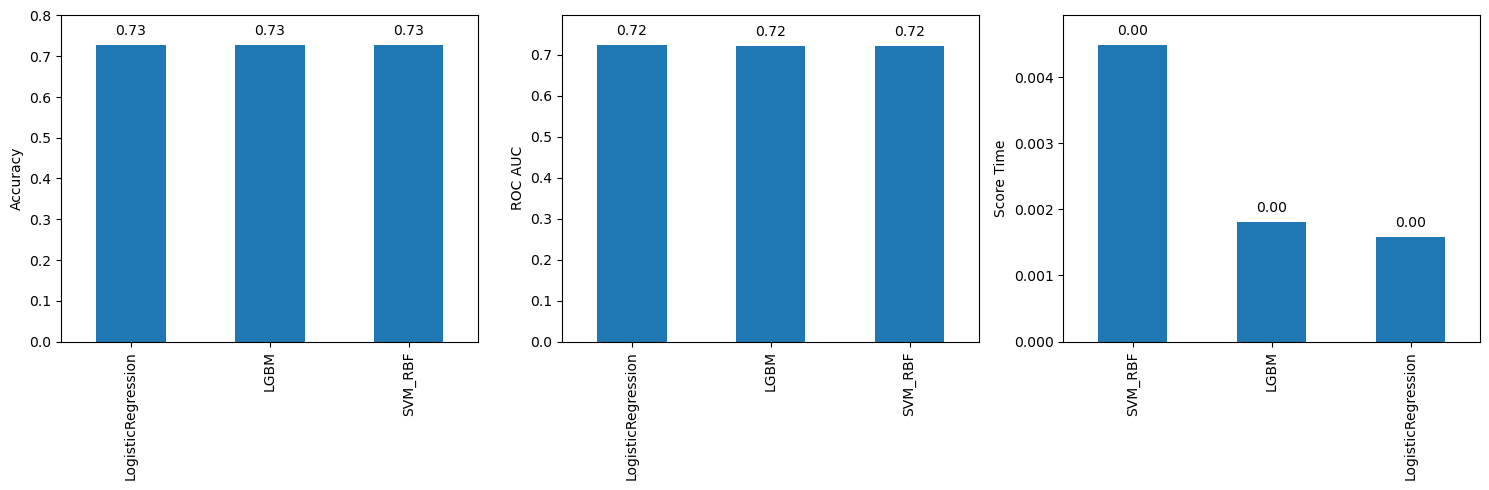

,Model,Accuracy,ROC AUC,Score Time
0,LogisticRegression,0.728155,0.724242,0.001589
1,LGBM,0.728155,0.721591,0.001805
2,SVM_RBF,0.728155,0.721591,0.004493


In [69]:
visualize_test_results(test_lowD_results)
# Print the dataframe
test_lowD_results

### Test best-performing models from group k-fold cross validation

In [ ]:
# Test the best models for grs_lowD_objects
grf_test_lowD_results = test_best_models(grs_lowD_objects, X_test, y_test)



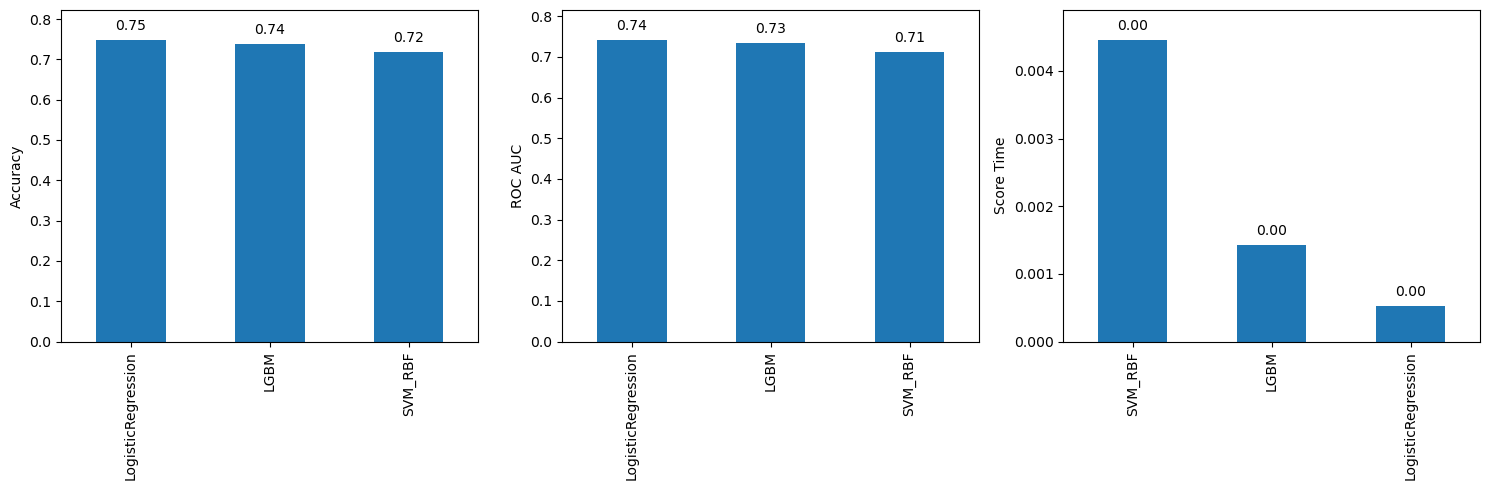

,Model,Accuracy,ROC AUC,Score Time
0,LogisticRegression,0.747573,0.741098,0.000523
1,LGBM,0.737864,0.734659,0.001431
2,SVM_RBF,0.718447,0.711174,0.004456


In [71]:
# Visualize the results
visualize_test_results(grf_test_lowD_results)
grf_test_lowD_results

In [ ]:
# Test the best models for grs_highD_objects
grs_test_highD_results = test_best_models(grs_highD_objects, X_test, y_test)




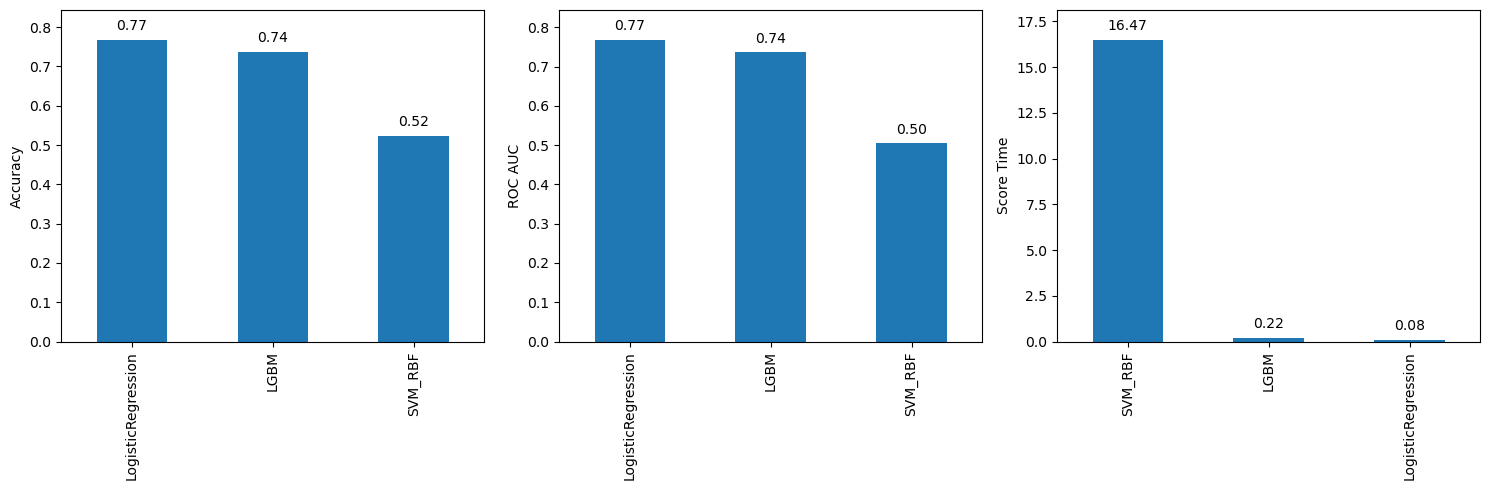

,Model,Accuracy,ROC AUC,Score Time
0,LogisticRegression,0.766990,0.767235,0.083269
1,LGBM,0.737864,0.735985,0.219493
2,SVM_RBF,0.524272,0.504167,16.468316


In [73]:
# Visualize the results
visualize_test_results(grs_test_highD_results)
grs_test_highD_results

### Visualise all together

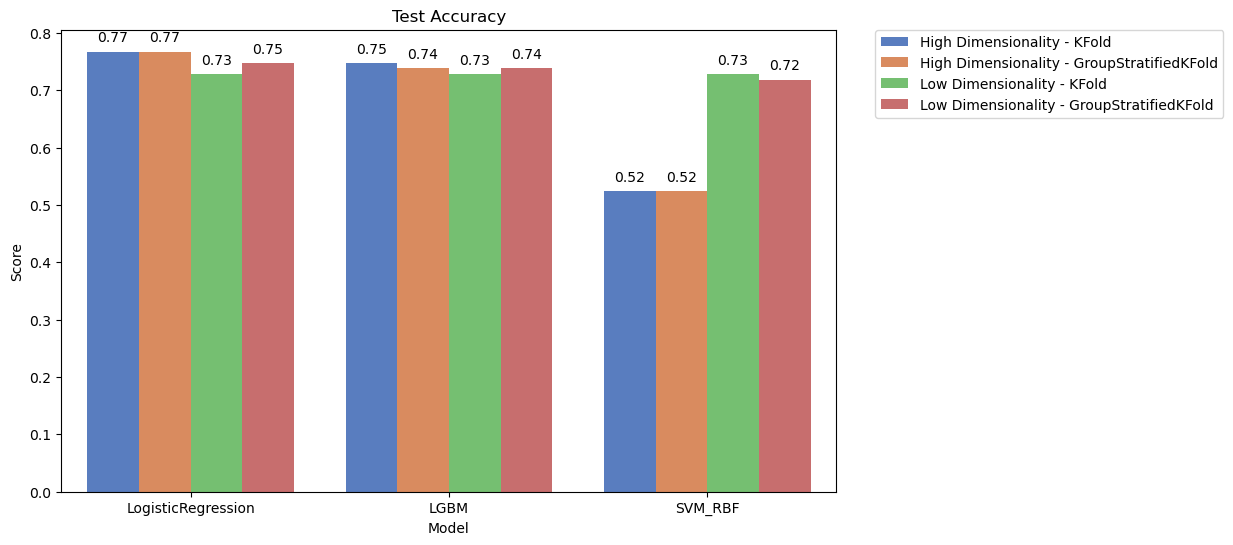

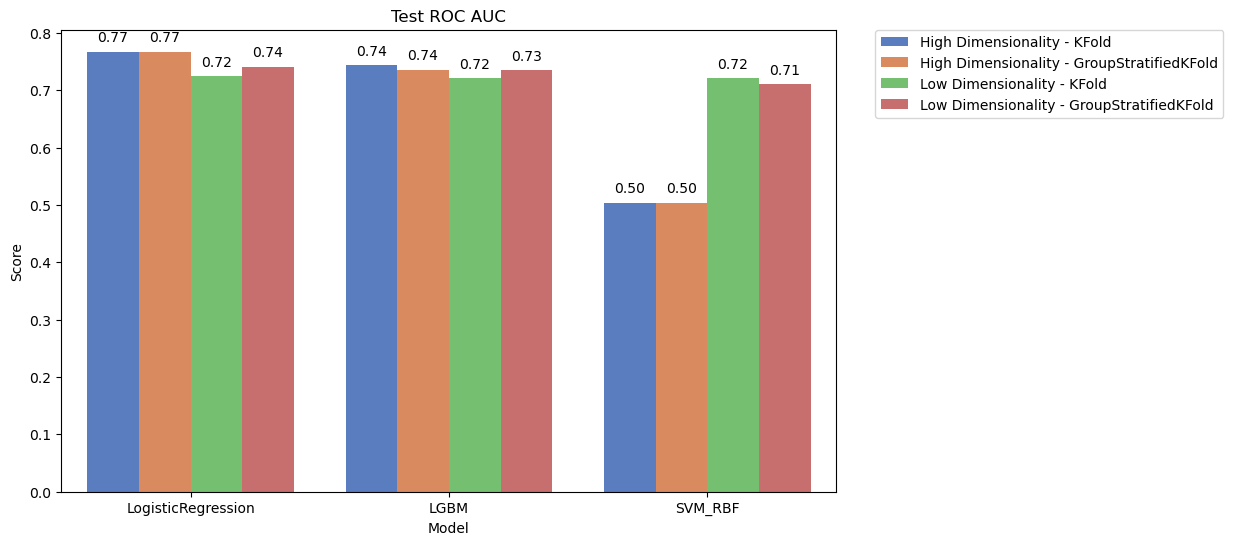

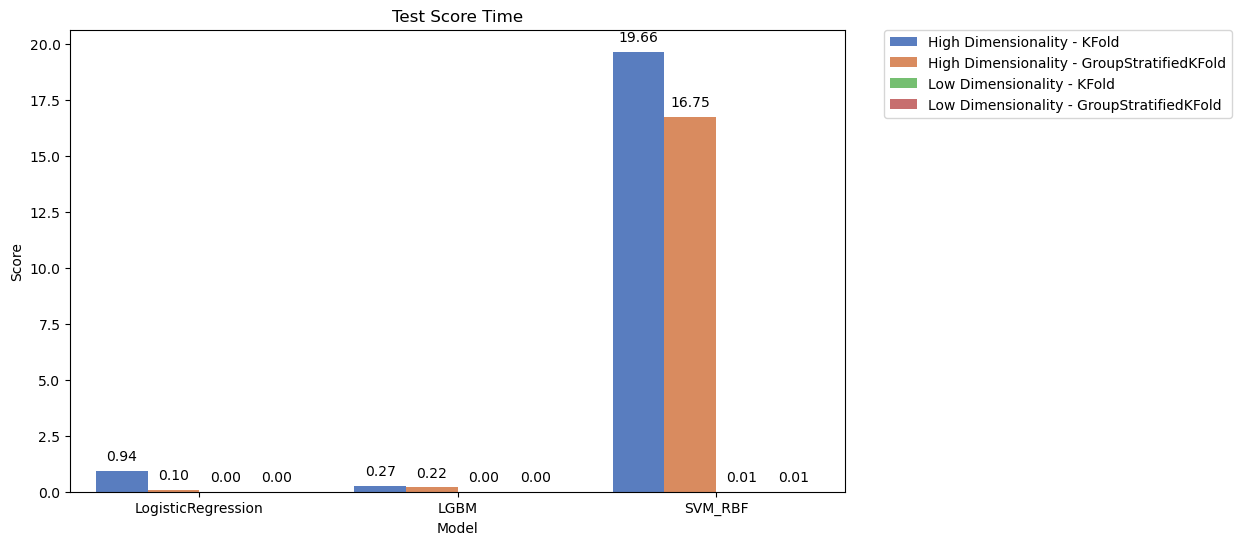

In [47]:


# Assuming the results are pandas DataFrames
results = {
    'High Dimensionality - KFold': test_highD_results,
    'High Dimensionality - GroupStratifiedKFold': grs_test_highD_results,
    'Low Dimensionality - KFold': test_lowD_results,
    'Low Dimensionality - GroupStratifiedKFold': grf_test_lowD_results,
}

# Define the metrics you want to plot
metrics = ['Accuracy', 'ROC AUC', 'Score Time']

# For each metric, create a new DataFrame that combines the results from all tests
for metric in metrics:
    combined_df = pd.DataFrame()

    for name, df in results.items():
        temp_df = df[['Model', metric]].copy()
        temp_df['Test Type'] = name
        combined_df = pd.concat([combined_df, temp_df])

    # Plot the combined results for this metric
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=combined_df, x='Model', y=metric, hue='Test Type', palette='muted' )
    
    # Move the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Add annotations to the bars
    for p in barplot.patches:
        height = p.get_height()
        # Only add annotation if height is greater than zero
        if height > 0:
            barplot.annotate(format(height, '.2f'), 
                             (p.get_x() + p.get_width() / 2., height), 
                             ha = 'center', va = 'center', 
                             xytext = (0, 10), 
                             textcoords = 'offset points')

    plt.title('Test '+ metric)
    plt.ylabel('Score')
    plt.show()

In [109]:


# Add a new column 'Test Type' to each DataFrame
test_highD_results['Test Type'] = 'HighD - KFold'
grs_test_highD_results['Test Type'] = 'HighD - GroupStratifiedKFold'
test_lowD_results['Test Type'] = 'LowD - KFold'
grf_test_lowD_results['Test Type'] = 'LowD - GroupStratifiedKFold'

# Concatenate all DataFrames
df_test_all = pd.concat([test_highD_results, grs_test_highD_results, test_lowD_results, grf_test_lowD_results])

# Add new columns to df_test_all (in same order)
df_test_all['Mean Fit Time Best Performer'] = df_all['Mean Fit Time Best Performer']
df_test_all['Std Train Time Best Performer'] = df_all['Std Train Time Best Performer']

df_test_all

,Model,Accuracy,ROC AUC,Score Time,Test Type,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,0.766990,0.767235,0.144517,HighD - KFold,621.0,2.6
1,LGBM,0.747573,0.743750,0.259799,HighD - KFold,456.7,112.1
2,SVM_RBF,0.524272,0.504167,16.590625,HighD - KFold,29.1,0.2
0,LogisticRegression,0.766990,0.767235,0.083269,HighD - GroupStratifiedKFold,1577.0,494.0
1,LGBM,0.737864,0.735985,0.219493,HighD - GroupStratifiedKFold,261.2,8.0
2,SVM_RBF,0.524272,0.504167,16.468316,HighD - GroupStratifiedKFold,11.7,4.9
0,LogisticRegression,0.728155,0.724242,0.001589,LowD - KFold,1.2,0.1
1,LGBM,0.728155,0.721591,0.001805,LowD - KFold,4.6,0.1
2,SVM_RBF,0.728155,0.721591,0.004493,LowD - KFold,1.1,0.0
0,LogisticRegression,0.747573,0.741098,0.000523,LowD - GroupStratifiedKFold,1.2,0.0


In [110]:
# Convert 'Accuracy' and 'ROC' to percentages and round to one decimal point
df_test_all['Accuracy'] = (df_test_all['Accuracy'] * 100).round(1)
df_test_all['ROC AUC'] = (df_test_all['ROC AUC'] * 100).round(1)

# Drop score time
df_test_all.drop('Score Time', axis=1, inplace=True)

# Move 'Test Type' to be the second column
# First, save the 'Test Type' column
test_type = df_test_all['Test Type']

# Then, drop the original 'Test Type' column (axis=1 denotes that we are removing a column)
df_test_all.drop('Test Type', axis=1, inplace=True)

# Then, insert it at the second position (index=1)
df_test_all.insert(1, 'Test Type', test_type)

df_test_all

,Model,Test Type,Accuracy,ROC AUC,Mean Fit Time Best Performer,Std Train Time Best Performer
0,LogisticRegression,HighD - KFold,76.7,76.7,621.0,2.6
1,LGBM,HighD - KFold,74.8,74.4,456.7,112.1
2,SVM_RBF,HighD - KFold,52.4,50.4,29.1,0.2
0,LogisticRegression,HighD - GroupStratifiedKFold,76.7,76.7,1577.0,494.0
1,LGBM,HighD - GroupStratifiedKFold,73.8,73.6,261.2,8.0
2,SVM_RBF,HighD - GroupStratifiedKFold,52.4,50.4,11.7,4.9
0,LogisticRegression,LowD - KFold,72.8,72.4,1.2,0.1
1,LGBM,LowD - KFold,72.8,72.2,4.6,0.1
2,SVM_RBF,LowD - KFold,72.8,72.2,1.1,0.0
0,LogisticRegression,LowD - GroupStratifiedKFold,74.8,74.1,1.2,0.0


In [112]:
# Convert DataFrame to LaTeX table
latex_test_table = df_test_all.to_latex(index=False)

print(latex_test_table)

\begin{tabular}{llrrrr}
\toprule
Model & Test Type & Accuracy & ROC AUC & Mean Fit Time Best Performer & Std Train Time Best Performer \\
\midrule
LogisticRegression & HighD - KFold & 76.700000 & 76.700000 & 621.000000 & 2.600000 \\
LGBM & HighD - KFold & 74.800000 & 74.400000 & 456.700000 & 112.100000 \\
SVM_RBF & HighD - KFold & 52.400000 & 50.400000 & 29.100000 & 0.200000 \\
LogisticRegression & HighD - GroupStratifiedKFold & 76.700000 & 76.700000 & 1577.000000 & 494.000000 \\
LGBM & HighD - GroupStratifiedKFold & 73.800000 & 73.600000 & 261.200000 & 8.000000 \\
SVM_RBF & HighD - GroupStratifiedKFold & 52.400000 & 50.400000 & 11.700000 & 4.900000 \\
LogisticRegression & LowD - KFold & 72.800000 & 72.400000 & 1.200000 & 0.100000 \\
LGBM & LowD - KFold & 72.800000 & 72.200000 & 4.600000 & 0.100000 \\
SVM_RBF & LowD - KFold & 72.800000 & 72.200000 & 1.100000 & 0.000000 \\
LogisticRegression & LowD - GroupStratifiedKFold & 74.800000 & 74.100000 & 1.200000 & 0.000000 \\
LGBM & LowD - Gro